In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

In [54]:
## Read in raw data
BASE_DIR = './../results/k-swap-clevr/hydra/'
files = glob(BASE_DIR + 'results-clevr-5000-stage-1-*.csv')

In [55]:
column_names = ["kswap_cost", "kswap_real_time", "kswap_run_time", "kswap_gen_size", "kswap_phi_size",
                "exhaustive_cost", "exhaustive_real_time", "exhaustive_run_time", "exhaustive_gen_size", "exhaustive_phi_size",
                "G1_length", "G2_length", "G1_variables", "G2_variables", "var_coeff", "atom_coeff", "class", "k", "W", "V", "scope"]

all_data = pd.concat((pd.read_csv(f, names=column_names) for f in files), ignore_index=True)
all_data.head()

,kswap_cost,kswap_real_time,kswap_run_time,kswap_gen_size,kswap_phi_size,exhaustive_cost,exhaustive_real_time,exhaustive_run_time,exhaustive_gen_size,exhaustive_phi_size,...,G2_length,G1_variables,G2_variables,var_coeff,atom_coeff,class,k,W,V,scope
0,16,1.0,0.242,10,4,16,9.0,9.434,6,4,...,6,10,7,604800,144,5000,1,1,NIL,global
1,20,0.0,0.076,7,3,16,0.0,0.046,6,3,...,6,8,7,40320,36,5000,1,1,NIL,global
2,20,0.0,0.036,6,2,20,0.0,0.044,6,2,...,4,10,5,30240,72,5000,1,1,NIL,global
3,18,0.0,0.086,9,3,16,0.0,0.233,12,3,...,4,10,5,30240,144,5000,1,1,NIL,global
4,12,0.0,0.053,5,3,12,0.0,0.015,2,3,...,4,8,5,6720,12,5000,1,1,NIL,global


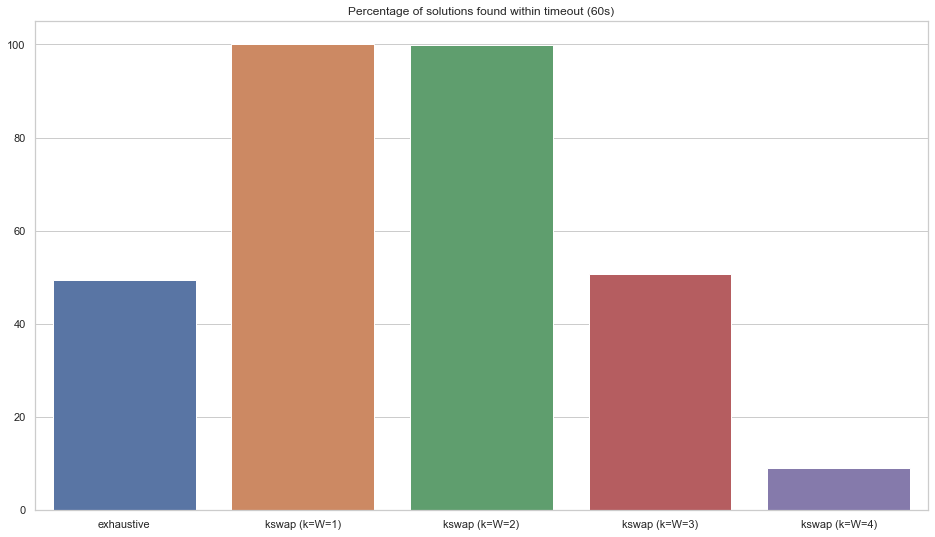

In [103]:
## Percentage of solutions found within timeout
len_exhaustive = len(all_data)
len_kswap_kw1 = len(all_data[all_data['k'] == 1])
len_kswap_kw2 = len(all_data[all_data['k'] == 2])
len_kswap_kw3 = len(all_data[all_data['k'] == 3])
len_kswap_kw4 = len(all_data[all_data['k'] == 4])

num_solutions_exhaustive = len(all_data[all_data['exhaustive_cost'] > -1])
num_solutions_kswap_kw1 = len(all_data[(all_data['k'] == 1) & (all_data['kswap_cost'] > -1)])
num_solutions_kswap_kw2 = len(all_data[(all_data['k'] == 2) & (all_data['kswap_cost'] > -1)])
num_solutions_kswap_kw3 = len(all_data[(all_data['k'] == 3) & (all_data['kswap_cost'] > -1)])
num_solutions_kswap_kw4 = len(all_data[(all_data['k'] == 4) & (all_data['kswap_cost'] > -1)])

plot_data = {
    'exhaustive': (num_solutions_exhaustive/len_exhaustive)*100,
    'kswap (k=W=1)': (num_solutions_kswap_kw1/len_kswap_kw1)*100,
    'kswap (k=W=2)': (num_solutions_kswap_kw2/len_kswap_kw2)*100,
    'kswap (k=W=3)': (num_solutions_kswap_kw3/len_kswap_kw3)*100,
    'kswap (k=W=4)': (num_solutions_kswap_kw4/len_kswap_kw4)*100,
}

fig, ax = plt.subplots(figsize=(16,9))
sns.set_theme(style='whitegrid')
ax = sns.barplot(x=list(plot_data.keys()), y=list(plot_data.values()))
ax.set_title('Percentage of solutions found within timeout (60s)')
plt.savefig('clevr-stage-3-percentage-solutions.pdf', bbox_inches='tight')

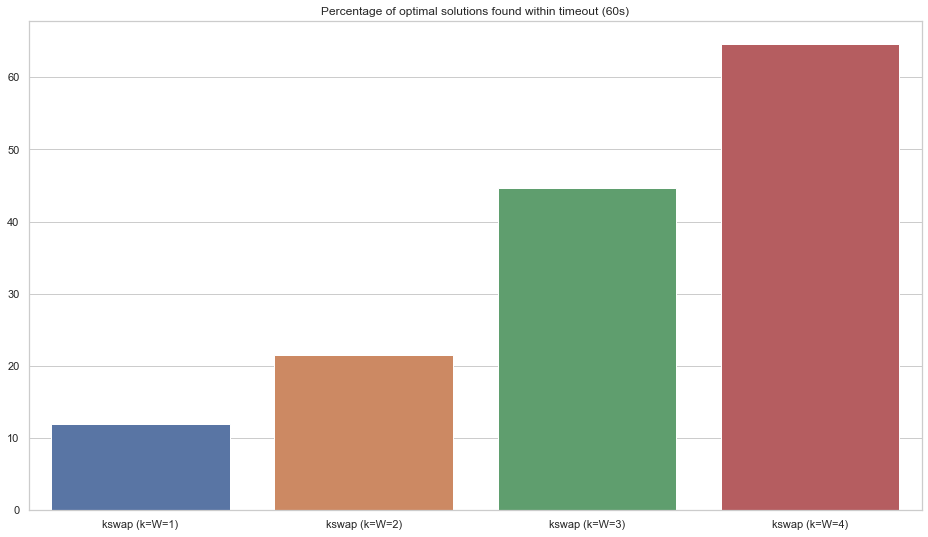

In [104]:
# Percentage of optimal solutions found by kswap
opt_solutions_kswap_kw1 = len(all_data[(all_data['k'] == 1) & (all_data['kswap_cost'] > -1) & (all_data['kswap_cost'] == all_data['exhaustive_cost'])])
opt_solutions_kswap_kw2 = len(all_data[(all_data['k'] == 2) & (all_data['kswap_cost'] > -1) & (all_data['kswap_cost'] == all_data['exhaustive_cost'])])
opt_solutions_kswap_kw3 = len(all_data[(all_data['k'] == 3) & (all_data['kswap_cost'] > -1) & (all_data['kswap_cost'] == all_data['exhaustive_cost'])])
opt_solutions_kswap_kw4 = len(all_data[(all_data['k'] == 4) & (all_data['kswap_cost'] > -1) & (all_data['kswap_cost'] == all_data['exhaustive_cost'])])

plot_data = {
    'kswap (k=W=1)': (opt_solutions_kswap_kw1/num_solutions_kswap_kw1)*100,
    'kswap (k=W=2)': (opt_solutions_kswap_kw2/num_solutions_kswap_kw2)*100,
    'kswap (k=W=3)': (opt_solutions_kswap_kw3/num_solutions_kswap_kw3)*100,
    'kswap (k=W=4)': (opt_solutions_kswap_kw4/num_solutions_kswap_kw4)*100,
}

fig, ax = plt.subplots(figsize=(16,9))
sns.set_theme(style='whitegrid')
ax = sns.barplot(x=list(plot_data.keys()), y=list(plot_data.values()))
ax.set_title('Percentage of optimal solutions found within timeout (60s)')
plt.savefig('clevr-stage-3-percentage-optimal-solutions.pdf', bbox_inches='tight')

In [105]:
## Relative change in cost
def percentage_increase(orig_value, new_value):
    if orig_value > -1 and new_value > -1:
        difference = (new_value + 1) - (orig_value + 1)
        increase = difference / (orig_value + 1)
        percentage = increase * 100
        return percentage

all_data['cost_increase'] = all_data.apply(lambda row: percentage_increase(row['exhaustive_cost'], row['kswap_cost']), axis=1)

plot_data = {
    'kswap (k=W=1)': all_data[all_data['k'] == 1]['cost_increase'].to_list(),
    'kswap (k=W=2)': all_data[all_data['k'] == 2]['cost_increase'].to_list(),
    'kswap (k=W=3)': all_data[all_data['k'] == 3]['cost_increase'].to_list(),
    'kswap (k=W=4)': all_data[all_data['k'] == 4]['cost_increase'].to_list(),
}
plot_data_df = pd.DataFrame(plot_data)

fig, ax = plt.subplots(figsize=(16,9))
sns.set_theme(style='whitegrid')
ax = sns.boxplot(data=plot_data_df, showfliers=True)
ax.set_title('Percentage increase in cost')
plt.savefig('clevr-stage-3-percentage-increase-cost.pdf', bbox_inches='tight')

ValueError: arrays must all be same length

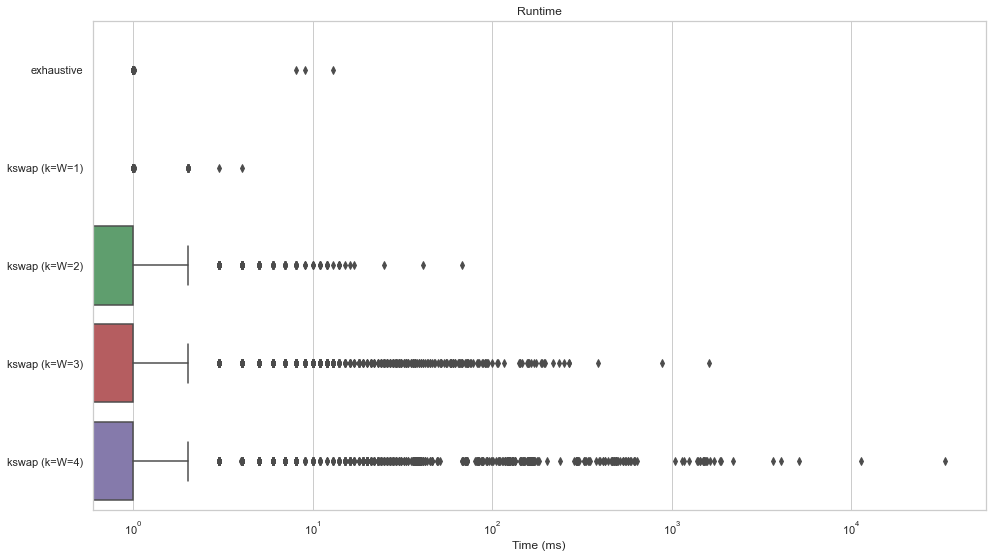

In [56]:
# Runtime
plot_data = {
    'exhaustive': all_data[(all_data['k'] == 1) & (all_data['exhaustive_real_time'] > -1)]['exhaustive_real_time'].to_list(),
    'kswap (k=W=1)': all_data[(all_data['k'] == 1) & (all_data['kswap_real_time'] > -1)]['kswap_real_time'].to_list(),
    'kswap (k=W=2)': all_data[(all_data['k'] == 2) & (all_data['kswap_real_time'] > -1)]['kswap_real_time'].to_list(),
    'kswap (k=W=3)': all_data[(all_data['k'] == 3) & (all_data['kswap_real_time'] > -1)]['kswap_real_time'].to_list(),
    'kswap (k=W=4)': all_data[(all_data['k'] == 4) & (all_data['kswap_real_time'] > -1)]['kswap_real_time'].to_list(),
}
keys, vals = zip(*plot_data.items())

fig, ax = plt.subplots(figsize=(16,9))
sns.set_theme(style='whitegrid')
ax.set_xscale('log')
ax = sns.boxplot(data=vals, orient='h')
ax.set_yticklabels(keys)
ax.set_xlabel('Time (ms)')
ax.set_title('Runtime')
plt.savefig('clevr-stage-1-runtime.pdf', bbox_inches='tight')